In [ ]:
from google.colab import files
uploaded = files.upload()

Saving student_performances.csv to student_performances (1).csv


# In this tutorial you are given a task of classifying students grades bases on various properties of the students and their families. The students can have 5 kinds of grades - Excellent, Very good, Good, Satisfactory, and poor.

# You need to develop different classifiers and determine which one of them give best performaces on various metrices.

# Import Libraries.
## I have imported few new libraries for this week  but you need to import rest of them.

In [41]:

# Your code to import all the relevant libraries.

from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Read and display dataset.

In [42]:
df= pd.read_csv('student_performances.csv')
df.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grades
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,no,no,4,3,4,1,1,3,6,poor
1,F,17,U,GT3,T,1,1,at_home,other,course,...,yes,no,5,3,3,1,1,3,4,poor
2,F,15,U,LE3,T,1,1,at_home,other,other,...,yes,no,4,3,2,2,3,3,10,satisfactory
3,F,15,U,GT3,T,4,2,health,services,home,...,yes,yes,3,2,2,1,1,5,2,very good
4,F,16,U,GT3,T,3,3,other,other,home,...,no,no,4,3,2,1,2,5,4,satisfactory


# Print the information about the dataset.

## You need to convert all the object datatypes (except output variable - grades) to the numbers using either labelencoding or one hot encoding.

In [43]:
col_to_convert = df.select_dtypes(include=['object']).columns.difference(['grades'])
print(col_to_convert)
df.info()

Index(['Fjob', 'Mjob', 'Pstatus', 'activities', 'address', 'famsize', 'famsup',
       'guardian', 'higher', 'internet', 'nursery', 'paid', 'reason',
       'romantic', 'schoolsup', 'sex'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   address     395 non-null    object
 3   famsize     395 non-null    object
 4   Pstatus     395 non-null    object
 5   Medu        395 non-null    int64 
 6   Fedu        395 non-null    int64 
 7   Mjob        395 non-null    object
 8   Fjob        395 non-null    object
 9   reason      395 non-null    object
 10  guardian    395 non-null    object
 11  traveltime  395 non-null    int64 
 12  studytime   395 non-null    int64 
 13  failures    395 non-null    int64 
 14  schoolsup   395 non-null    object
 15

In [7]:
label_encoder = LabelEncoder()

for col in col_to_convert:
    df[col] = label_encoder.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    int32 
 1   age         395 non-null    int64 
 2   address     395 non-null    int32 
 3   famsize     395 non-null    int32 
 4   Pstatus     395 non-null    int32 
 5   Medu        395 non-null    int64 
 6   Fedu        395 non-null    int64 
 7   Mjob        395 non-null    int32 
 8   Fjob        395 non-null    int32 
 9   reason      395 non-null    int32 
 10  guardian    395 non-null    int32 
 11  traveltime  395 non-null    int64 
 12  studytime   395 non-null    int64 
 13  failures    395 non-null    int64 
 14  schoolsup   395 non-null    int32 
 15  famsup      395 non-null    int32 
 16  paid        395 non-null    int32 
 17  activities  395 non-null    int32 
 18  nursery     395 non-null    int32 
 19  higher      395 non-null    int32 
 20  internet  

# Converting the columns  ['Fjob', 'Mjob', 'reason', 'guardian'] into one hot vectors.

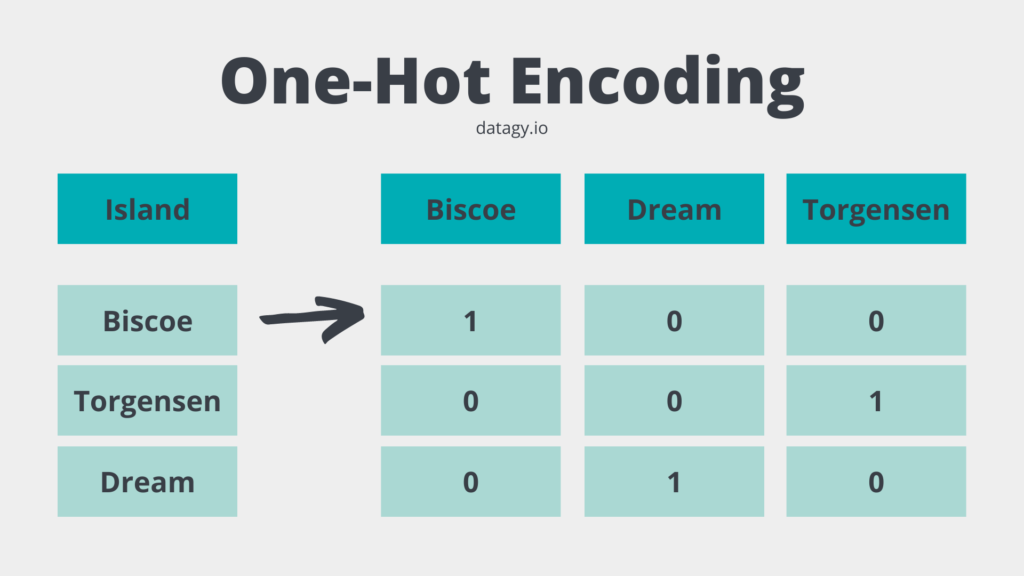

In [44]:
data = pd.get_dummies(df, columns = ['Fjob', 'Mjob', 'reason', 'guardian'])
data.info

<bound method DataFrame.info of     sex  age address famsize Pstatus  Medu  Fedu  traveltime  studytime  \
0     F   18       U     GT3       A     4     4           2          2   
1     F   17       U     GT3       T     1     1           1          2   
2     F   15       U     LE3       T     1     1           1          2   
3     F   15       U     GT3       T     4     2           1          3   
4     F   16       U     GT3       T     3     3           1          2   
..   ..  ...     ...     ...     ...   ...   ...         ...        ...   
390   M   20       U     LE3       A     2     2           1          2   
391   M   17       U     LE3       T     3     1           2          1   
392   M   21       R     GT3       T     1     1           1          1   
393   M   18       R     LE3       T     3     2           3          1   
394   M   19       U     LE3       T     1     1           1          1   

     failures  ... Mjob_other Mjob_services Mjob_teacher reason_cou

# Note that you can also use sklearn.preprocessing.OneHotEncoder instead of pd.get_dummies.

# Next, print the first few rows of the data (dataset have been stored in data in previous cell).

In [ ]:
# Your code to print first few rows of the data.

# Converting other text values in the dataframe to numbers using label encoding.

In [45]:
labelencoder = LabelEncoder()

labelencoder.fit(data['sex'])
data ['sex'] = labelencoder.transform(data['sex'])

#
## Your code to convert transform address to the numbers
labelencoder.fit(data['address'])
data ['address'] = labelencoder.transform(data['address'])
#


#
## Your code to convert transform famsize to the numbers
labelencoder.fit(data['famsize'])
data ['famsize'] = labelencoder.transform(data['famsize'])
#


#
## Your code to convert transform Pstatus to the numbers
labelencoder.fit(data['Pstatus'])
data ['Pstatus'] = labelencoder.transform(data['Pstatus'])
#


#
## Your code to convert transform schoolsup to the numbers
labelencoder.fit(data['schoolsup'])
data ['schoolsup'] = labelencoder.transform(data['schoolsup'])
#


#
## Your code to convert transform famsup to the numbers
labelencoder.fit(data['famsup'])
data ['famsup'] = labelencoder.transform(data['famsup'])
#

#
## Your code to convert transform paid to the numbers
labelencoder.fit(data['paid'])
data ['paid'] = labelencoder.transform(data['paid'])
#


#
## Your code to convert transform activities to the numbers
labelencoder.fit(data['activities'])
data ['activities'] = labelencoder.transform(data['activities'])
#


#
## Your code to convert transform nursery to the numbers
labelencoder.fit(data['nursery'])
data ['nursery'] = labelencoder.transform(data['nursery'])
#


#
## Your code to convert transform higher to the numbers
labelencoder.fit(data['higher'])
data ['higher'] = labelencoder.transform(data['higher'])
#


#
## Your code to convert transform internet to the numbers
#
labelencoder.fit(data['internet'])
data ['internet'] = labelencoder.transform(data['internet'])

#
## Your code to convert transform romantic to the numbers
labelencoder.fit(data['romantic'])
data ['romantic'] = labelencoder.transform(data['romantic'])
#


# Is their an efficient way to do this? Could you use loops. Try to convert it into an efficient code and replace with the above code?


# Next - Print few samples of the data to ensure everything is number except 'grades' column.

In [46]:
data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,18,1,0,0,4,4,2,2,0,...,False,False,False,True,False,False,False,False,True,False
1,0,17,1,0,1,1,1,1,2,0,...,False,False,False,True,False,False,False,True,False,False
2,0,15,1,1,1,1,1,1,2,3,...,False,False,False,False,False,True,False,False,True,False
3,0,15,1,0,1,4,2,1,3,0,...,False,False,False,False,True,False,False,False,True,False
4,0,16,1,0,1,3,3,1,2,0,...,True,False,False,False,True,False,False,True,False,False


In [ ]:
# Your code to print first few samples of the data.

In [ ]:
# Your code to print information on the samples of data.

# Separate input X and output y.

## X is the all columns except 'grades'.
## y is 'grades' column.

In [47]:
# Your code to get X from data
# Your code to get y from data
X = data.drop('grades', axis=1).values

X

array([[0, 18, 1, ..., False, True, False],
       [0, 17, 1, ..., True, False, False],
       [0, 15, 1, ..., False, True, False],
       ...,
       [1, 21, 0, ..., False, False, True],
       [1, 18, 0, ..., False, True, False],
       [1, 19, 1, ..., True, False, False]], dtype=object)

In [48]:
labelencoder.fit(data['grades'])
data['grades'] = labelencoder.transform(data['grades'])

In [49]:
data['grades'].value_counts()

grades
2    130
3    103
1     62
4     60
0     40
Name: count, dtype: int64

In [50]:
y = data['grades'].values
y

array([2, 2, 3, 4, 3, 4, 3, 2, 0, 4, 2, 1, 4, 3, 0, 4, 4, 3, 2, 3, 4, 4,
       0, 1, 2, 2, 3, 4, 3, 3, 1, 0, 0, 1, 4, 2, 0, 4, 3, 1, 3, 1, 0, 3,
       2, 2, 3, 0, 4, 2, 1, 1, 3, 3, 1, 3, 4, 4, 2, 0, 3, 3, 2, 2, 3, 4,
       1, 2, 2, 0, 4, 3, 2, 4, 3, 3, 3, 3, 3, 2, 1, 3, 2, 4, 3, 2, 2, 4,
       3, 2, 2, 0, 2, 3, 4, 3, 4, 3, 4, 2, 2, 0, 4, 2, 0, 3, 2, 0, 1, 0,
       0, 3, 1, 0, 2, 0, 4, 1, 2, 1, 4, 4, 1, 1, 2, 1, 3, 2, 2, 0, 2, 2,
       1, 3, 2, 2, 2, 2, 1, 4, 2, 2, 3, 1, 2, 3, 2, 3, 2, 3, 2, 4, 3, 2,
       1, 2, 1, 3, 4, 1, 2, 2, 2, 3, 2, 1, 3, 0, 2, 4, 2, 0, 3, 2, 2, 2,
       3, 2, 2, 3, 2, 1, 0, 2, 1, 3, 3, 4, 2, 3, 1, 2, 2, 3, 4, 4, 0, 3,
       0, 3, 0, 3, 3, 2, 3, 2, 2, 1, 3, 2, 2, 1, 4, 2, 3, 4, 2, 2, 2, 3,
       2, 2, 0, 1, 4, 2, 4, 1, 2, 1, 4, 3, 2, 1, 2, 3, 1, 1, 3, 2, 1, 1,
       2, 1, 2, 0, 1, 2, 2, 4, 2, 3, 2, 2, 1, 2, 1, 3, 4, 2, 0, 2, 1, 2,
       2, 0, 3, 3, 3, 2, 2, 4, 3, 4, 3, 1, 2, 2, 2, 3, 2, 3, 1, 3, 3, 3,
       0, 1, 4, 4, 3, 4, 1, 0, 4, 3, 2, 2, 4, 0, 3,

# Print shapes of X and y to make sure everything is good

In [51]:
# Print shape of X
X.shape
# Print shape of y
y.shape
# Print X
X

array([[0, 18, 1, ..., False, True, False],
       [0, 17, 1, ..., True, False, False],
       [0, 15, 1, ..., False, True, False],
       ...,
       [1, 21, 0, ..., False, False, True],
       [1, 18, 0, ..., False, True, False],
       [1, 19, 1, ..., True, False, False]], dtype=object)

In [52]:
# Print y
y

array([2, 2, 3, 4, 3, 4, 3, 2, 0, 4, 2, 1, 4, 3, 0, 4, 4, 3, 2, 3, 4, 4,
       0, 1, 2, 2, 3, 4, 3, 3, 1, 0, 0, 1, 4, 2, 0, 4, 3, 1, 3, 1, 0, 3,
       2, 2, 3, 0, 4, 2, 1, 1, 3, 3, 1, 3, 4, 4, 2, 0, 3, 3, 2, 2, 3, 4,
       1, 2, 2, 0, 4, 3, 2, 4, 3, 3, 3, 3, 3, 2, 1, 3, 2, 4, 3, 2, 2, 4,
       3, 2, 2, 0, 2, 3, 4, 3, 4, 3, 4, 2, 2, 0, 4, 2, 0, 3, 2, 0, 1, 0,
       0, 3, 1, 0, 2, 0, 4, 1, 2, 1, 4, 4, 1, 1, 2, 1, 3, 2, 2, 0, 2, 2,
       1, 3, 2, 2, 2, 2, 1, 4, 2, 2, 3, 1, 2, 3, 2, 3, 2, 3, 2, 4, 3, 2,
       1, 2, 1, 3, 4, 1, 2, 2, 2, 3, 2, 1, 3, 0, 2, 4, 2, 0, 3, 2, 2, 2,
       3, 2, 2, 3, 2, 1, 0, 2, 1, 3, 3, 4, 2, 3, 1, 2, 2, 3, 4, 4, 0, 3,
       0, 3, 0, 3, 3, 2, 3, 2, 2, 1, 3, 2, 2, 1, 4, 2, 3, 4, 2, 2, 2, 3,
       2, 2, 0, 1, 4, 2, 4, 1, 2, 1, 4, 3, 2, 1, 2, 3, 1, 1, 3, 2, 1, 1,
       2, 1, 2, 0, 1, 2, 2, 4, 2, 3, 2, 2, 1, 2, 1, 3, 4, 2, 0, 2, 1, 2,
       2, 0, 3, 3, 3, 2, 2, 4, 3, 4, 3, 1, 2, 2, 2, 3, 2, 3, 1, 3, 3, 3,
       0, 1, 4, 4, 3, 4, 1, 0, 4, 3, 2, 2, 4, 0, 3,

# Next  - Split data into train and test set.

In [53]:
# Your code to split data into train and test set.

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.4, random_state = 42)


# Your code to Print the shapes of the X_train, X_test, y_train, y_test

print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(237, 42)
(158, 42)
(237,)
(158,)


# Next - Develop a SVM classifier and fit into the train dataset.

In [54]:
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC()

# Next - prdict the values on the input test set.

# Find accuracy, precision, recall, f-score.

In [55]:
y_pred = classifier.predict(X_test)

print (print("Accuracy test set: ", accuracy_score(y_test, y_pred)))

print (print("Precision test set: ", precision_score(y_test, y_pred, average = 'micro' )))
print (print("Recall test set: ", recall_score(y_test, y_pred, average = 'micro' )))
print (print("F-score test set: ", f1_score(y_test, y_pred, average = 'micro' )))

print (classification_report(y_test, y_pred))

Accuracy test set:  0.2974683544303797
None
Precision test set:  0.2974683544303797
None
Recall test set:  0.2974683544303797
None
F-score test set:  0.2974683544303797
None
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.00      0.00      0.00        23
           2       0.36      0.64      0.46        56
           3       0.19      0.29      0.23        38
           4       0.00      0.00      0.00        23

    accuracy                           0.30       158
   macro avg       0.11      0.19      0.14       158
weighted avg       0.17      0.30      0.22       158



C:\Users\Hp zBook G5\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp zBook G5\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp zBook G5\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Find accuracy, precision, recall, and f-score on training dataset.

In [56]:
train_data_predictions = classifier.predict(X_train)

print (print("Accuracy train set: ", accuracy_score(y_train, train_data_predictions)))
print (print("Precision train set: ", precision_score(y_train, train_data_predictions, average = 'micro' )))
print (print("Recall train set: ", recall_score(y_train, train_data_predictions, average = 'micro' )))
print (print("F-score train set: ", f1_score(y_train, train_data_predictions, average = 'micro' )))

print (classification_report(y_train, train_data_predictions))

Accuracy train set:  0.3670886075949367
None
Precision train set:  0.3670886075949367
None
Recall train set:  0.3670886075949367
None
F-score train set:  0.3670886075949367
None
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        39
           2       0.38      0.73      0.50        74
           3       0.35      0.51      0.41        65
           4       0.00      0.00      0.00        37

    accuracy                           0.37       237
   macro avg       0.15      0.25      0.18       237
weighted avg       0.21      0.37      0.27       237



C:\Users\Hp zBook G5\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp zBook G5\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp zBook G5\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Display confusion matrix between actual and predicted values on the test data.

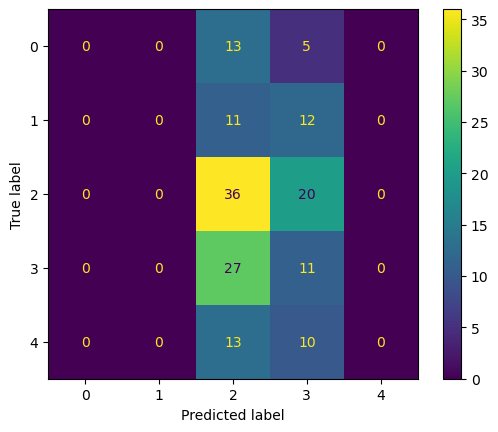

In [57]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)

disp.plot()
plt.show()

# Earlier, we used rfb Kernel. Now, we will test other kernels too.

# We will test on ['linear', 'poly', 'rbf', 'sigmoid' ] kernels.

In [58]:
# Create a list kernels with values ['linear', 'poly', 'rbf', 'sigmoid' ]
# Create an empty list accuracy
kernels = ['linear', 'poly', 'rbf', 'sigmoid' ]



Accuracy with 'linear' kernel: 0.2974683544303797
Accuracy with 'poly' kernel: 0.310126582278481
Accuracy with 'rbf' kernel: 0.2974683544303797
Accuracy with 'sigmoid' kernel: 0.34177215189873417


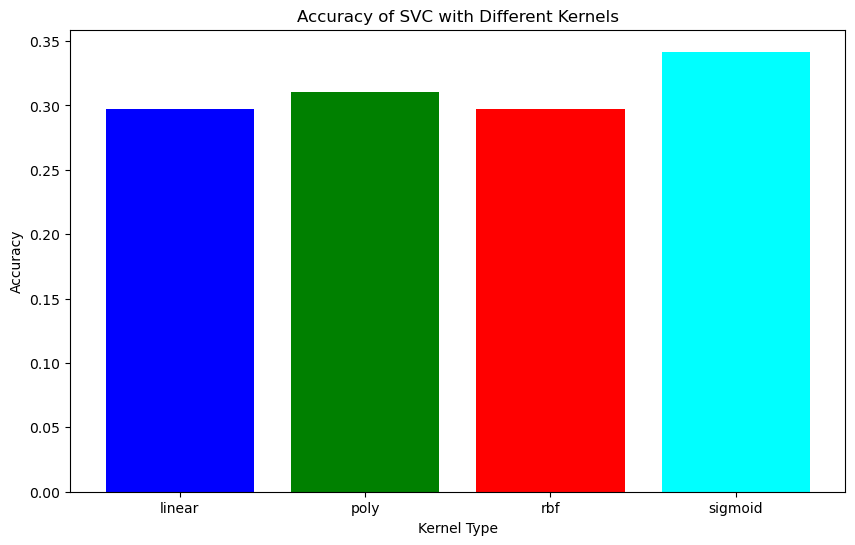

In [59]:
# Create an empty list to store accuracy scores
accuracy_scores = []

# Train the classifier with different kernels and record the accuracy
for kernel in kernels:
    classifier = SVC(kernel=kernel)  # Use the `kernel` variable here
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Accuracy with '{kernel}' kernel:", accuracy)

# Plot accuracy vs kernels
plt.figure(figsize=(10, 6))
plt.bar(kernels, accuracy_scores, color=['blue', 'green', 'red', 'cyan'])
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('Accuracy of SVC with Different Kernels')
plt.xticks(kernels)
plt.show()


# Which Kernel function is giving you best accuracy?

# Next - Develop KNN and Losgistic regression classifiers for this dataset.

In [60]:
#
# Develop KNN-based classifier. Use number of neigbours of your choice
#
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors for this example
knn_classifier.fit(X_train, y_train)

# Making predictions
y_pred_knn = knn_classifier.predict(X_test)

# Evaluating the classifier
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Classifier Accuracy: {knn_accuracy:.2f}")


KNN Classifier Accuracy: 0.29


# Evaluate KNN for accuracy, precision, recall, f-score, and classification report on test data.

In [61]:
#
#
# Your code to evaluate the classifer on test data
#
#
# Evaluate the classifier
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average='weighted')  # Use 'weighted' for imbalanced classes
knn_recall = recall_score(y_test, y_pred_knn, average='weighted')
knn_f1_score = f1_score(y_test, y_pred_knn, average='weighted')

# Print the evaluation results
print(f"KNN Classifier Accuracy: {knn_accuracy:.2f}")
print(f"KNN Classifier Precision: {knn_precision:.2f}")
print(f"KNN Classifier Recall: {knn_recall:.2f}")
print(f"KNN Classifier F1-Score: {knn_f1_score:.2f}")

# Classification report
knn_classification_report = classification_report(y_test, y_pred_knn)
print("KNN Classifier Classification Report:")
print(knn_classification_report)

KNN Classifier Accuracy: 0.29
KNN Classifier Precision: 0.31
KNN Classifier Recall: 0.29
KNN Classifier F1-Score: 0.30
KNN Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.17      0.21        18
           1       0.14      0.22      0.17        23
           2       0.43      0.38      0.40        56
           3       0.26      0.32      0.29        38
           4       0.29      0.22      0.25        23

    accuracy                           0.29       158
   macro avg       0.28      0.26      0.26       158
weighted avg       0.31      0.29      0.30       158



# Evaluate KNN for accuracy, precision, recall, f-score, and classification report on train data.



In [69]:
# Predictions on training data
train_pred_knn = knn_classifier.predict(X_train)

# Evaluating the KNN classifier on the test data
knn_accuracy_test = accuracy_score(y_test, y_pred_knn)
knn_precision_test = precision_score(y_test, y_pred_knn, average='weighted')
knn_recall_test = recall_score(y_test, y_pred_knn, average='weighted')
knn_f1_score_test = f1_score(y_test, y_pred_knn, average='weighted')

# Print the evaluation results for KNN on the test data
print(f"KNN Test Data - Accuracy: {knn_accuracy_test:.2f}, Precision: {knn_precision_test:.2f}, Recall: {knn_recall_test:.2f}, F1-Score: {knn_f1_score_test:.2f}")

# Classification report
print("\nKNN Classifier Training Data Classification Report:")
print(classification_report(y_train, train_pred_knn))

KNN Test Data - Accuracy: 0.29, Precision: 0.31, Recall: 0.29, F1-Score: 0.30

KNN Classifier Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.18      0.23        22
           1       0.51      0.62      0.56        39
           2       0.63      0.72      0.67        74
           3       0.44      0.45      0.44        65
           4       0.41      0.30      0.34        37

    accuracy                           0.51       237
   macro avg       0.46      0.45      0.45       237
weighted avg       0.49      0.51      0.50       237



# Display confusion matric between predicted and actual values.

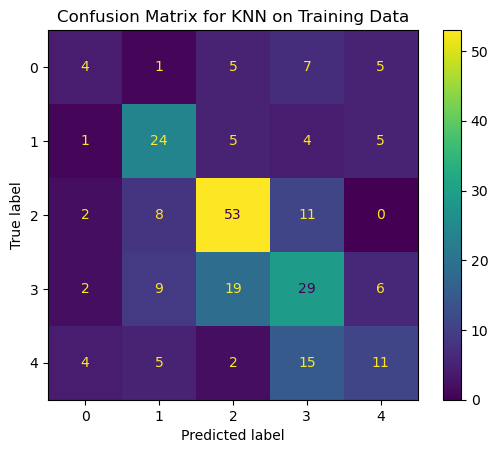

In [63]:
#
#
# Your code to display confusion matrix
#
#
# Confusion matrix for KNN on training data
cm_knn_train = confusion_matrix(y_train, train_pred_knn)
disp_knn_train = ConfusionMatrixDisplay(confusion_matrix=cm_knn_train)
disp_knn_train.plot()
plt.title('Confusion Matrix for KNN on Training Data')
plt.show()


# Develop Logistic Regression-based classifier.

In [64]:
#
# Your code to develop logistic regression-based classifier
#
from sklearn.linear_model import LogisticRegression

# Develop Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train, y_train)


C:\Users\Hp zBook G5\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

# Evaluate Logistic Regression for accuracy, precision, recall, f-score, and classification report on test data.

In [70]:
y_pred_logreg_test = logreg_classifier.predict(X_test)


# Evaluating the Logistic Regression classifier on the test data
logreg_accuracy_test = accuracy_score(y_test, y_pred_logreg_test)
logreg_precision_test = precision_score(y_test, y_pred_logreg_test, average='weighted')
logreg_recall_test = recall_score(y_test, y_pred_logreg_test, average='weighted')
logreg_f1_score_test = f1_score(y_test, y_pred_logreg_test, average='weighted')

# Print the evaluation results for Logistic Regression on the test data
print(f"Logistic Regression Test Data - Accuracy: {logreg_accuracy_test:.2f}, Precision: {logreg_precision_test:.2f}, Recall: {logreg_recall_test:.2f}, F1-Score: {logreg_f1_score_test:.2f}")

# Classification report
print("\nLogistic Regression Classifier Test Data Classification Report:")
print(classification_report(y_test, y_pred_logreg_test))

Logistic Regression Test Data - Accuracy: 0.35, Precision: 0.36, Recall: 0.35, F1-Score: 0.36

Logistic Regression Classifier Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.17      0.21        18
           1       0.17      0.17      0.17        23
           2       0.57      0.52      0.54        56
           3       0.29      0.29      0.29        38
           4       0.26      0.39      0.31        23

    accuracy                           0.35       158
   macro avg       0.31      0.31      0.30       158
weighted avg       0.36      0.35      0.36       158



# Evaluate Logistic regression for accuracy, precision, recall, f-score, and classification report on train data.

In [66]:
#
#
#
# Your code to evaluate the logistic regression classifier on train data
#
#
#
# Predictions on training data
train_pred_logreg = logreg_classifier.predict(X_train)

# Evaluate the classifier
logreg_accuracy_train = accuracy_score(y_train, train_pred_logreg)
logreg_precision_train = precision_score(y_train, train_pred_logreg, average='weighted')
logreg_recall_train = recall_score(y_train, train_pred_logreg, average='weighted')
logreg_f1_score_train = f1_score(y_train, train_pred_logreg, average='weighted')

# Print the evaluation results
print("Logistic Regression Classifier Training Data Evaluation:")
print(f"Accuracy: {logreg_accuracy_train:.2f}")
print(f"Precision: {logreg_precision_train:.2f}")
print(f"Recall: {logreg_recall_train:.2f}")
print(f"F1-Score: {logreg_f1_score_train:.2f}")

# Classification report
print("\nLogistic Regression Classifier Training Data Classification Report:")
print(classification_report(y_train, train_pred_logreg))


Logistic Regression Classifier Training Data Evaluation:
Accuracy: 0.53
Precision: 0.53
Recall: 0.53
F1-Score: 0.53

Logistic Regression Classifier Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.50      0.56        22
           1       0.46      0.28      0.35        39
           2       0.62      0.65      0.63        74
           3       0.45      0.55      0.50        65
           4       0.53      0.54      0.53        37

    accuracy                           0.53       237
   macro avg       0.54      0.51      0.51       237
weighted avg       0.53      0.53      0.53       237



# Display confusion matrix between predicted and actual values for logistic regression.

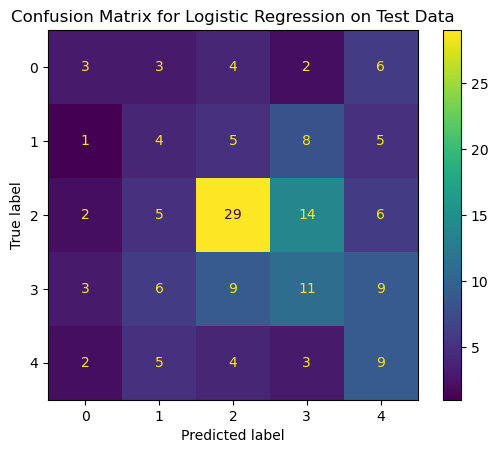

In [67]:
#
# Your code to display confusion matrix for logistic regression
#
# Confusion matrix for Logistic Regression on test data
cm_logreg_test = confusion_matrix(y_test, y_pred_logreg_test)
disp_logreg_test = ConfusionMatrixDisplay(confusion_matrix=cm_logreg_test)
disp_logreg_test.plot()
plt.title('Confusion Matrix for Logistic Regression on Test Data')
plt.show()


Next, compare the accuracy, precision, recall, and F-score for all the classifiers using plots. You need to have only one plot rather than 4 different plots for 4 different meteruces.

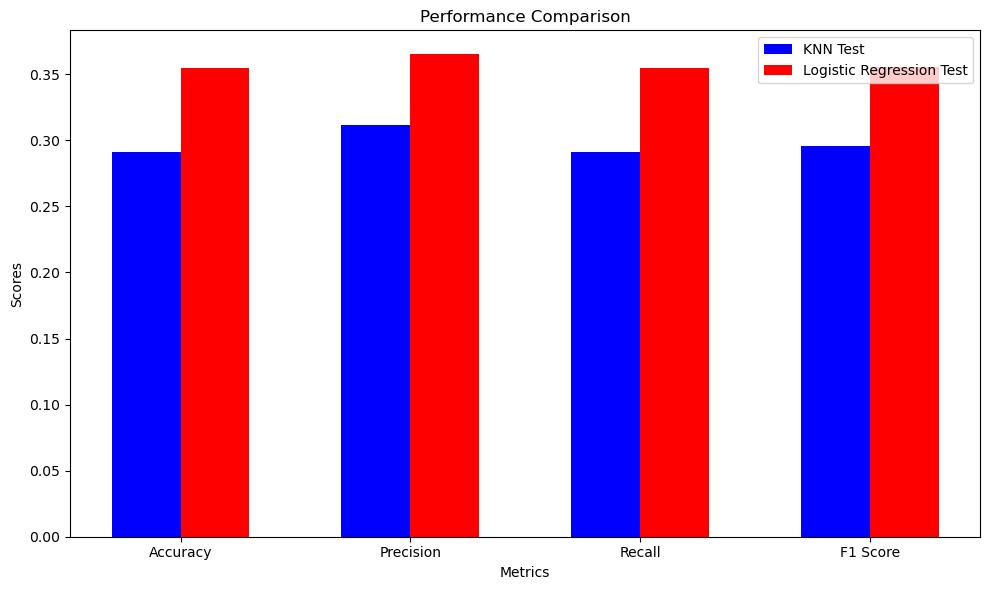

In [71]:
# Plot and compare the performance of different algorithms
plt.figure(figsize=(10, 6))
bar_width = 0.3
index = np.arange(4)

bar1 = plt.bar(index, [knn_accuracy_test, knn_precision_test, knn_recall_test, knn_f1_score_test], bar_width, label='KNN Test', color='b')
bar2 = plt.bar(index + bar_width, [logreg_accuracy_test, logreg_precision_test, logreg_recall_test, logreg_f1_score_test], bar_width, label='Logistic Regression Test', color='r')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance Comparison')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()
plt.tight_layout()
plt.show()



In [72]:
knn_accuracy_test = accuracy_score(y_test, y_pred_knn)
logreg_accuracy_test = accuracy_score(y_test, y_pred_logreg_test)

# Print accuracy scores
print(f"KNN Test Accuracy: {knn_accuracy_test:.2f}")
print(f"Logistic Regression Test Accuracy: {logreg_accuracy_test:.2f}")

KNN Test Accuracy: 0.29
Logistic Regression Test Accuracy: 0.35



### **Important - Document in your Lab Logbook**

# 1.   Include a plot comparing the performance of various algorithms.
# 2.    Specify the best-performing algorithm and indicate which category exhibits the best and least performance based on the confusion metrics.

